In [1]:
from chebpy2 import Chebfun2, Quasimatrix
import chebpy as cp
import numpy as np

In [2]:
def green(x,s):
    g = 0
    g = (x <= s) * (x * (1-s)) + (x > s) * (s * (1-x))
    return g

In [3]:
prefx = cp.core.settings.ChebPreferences()
prefy = cp.core.settings.ChebPreferences()
prefx.eps = 1e-6
prefy.eps = 1e-6

In [4]:
%%time
c = Chebfun2(green, domain = [0, 1, 0, 1], prefx = prefx, prefy = prefy)

CPU times: user 9.04 s, sys: 3.86 s, total: 12.9 s
Wall time: 12.8 s


In [8]:
c.cols[np.linspace(0,1,10),4:10]

array([[-6.93889390e-18, -1.35224430e-09,  2.71638701e-10,
         7.97576492e-09, -5.35390115e-09, -7.06705793e-09,
         8.89464859e-08,  1.39787055e-02,  5.56380699e-02,
         0.00000000e+00],
       [ 8.67361738e-19, -1.31537426e-08, -1.03602937e-08,
         4.16628816e-02,  2.77073416e-02, -5.80284970e-07,
         2.30684393e-07,  4.74785306e-09, -1.78423852e-08,
         2.60208521e-18],
       [-8.67361738e-19, -1.78423852e-08,  4.74785305e-09,
         2.30684393e-07, -5.80284970e-07,  2.77073416e-02,
         4.16628816e-02, -1.03602937e-08, -1.31537426e-08,
        -5.20417043e-18],
       [ 0.00000000e+00,  2.67352447e-07,  1.39990546e-02,
         5.32354278e-07, -2.83365450e-07,  1.93638229e-07,
        -1.43668101e-07, -3.72863787e-09,  1.59652932e-08,
         6.50521303e-19],
       [ 1.51788304e-18,  1.59652932e-08, -3.72863786e-09,
        -1.43668101e-07,  1.93638229e-07, -2.83365450e-07,
         5.32354278e-07,  1.39990546e-02,  2.67352447e-07,
         4.

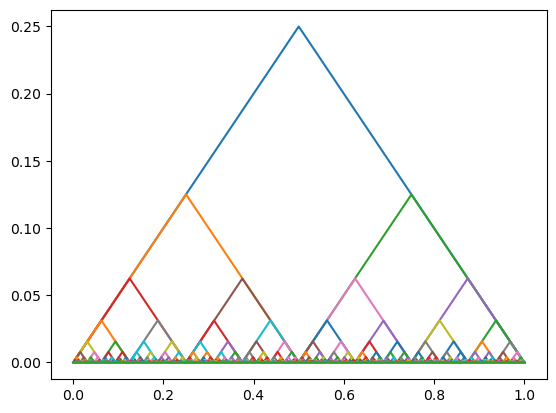

In [7]:
c.cols[:,:].plot()